In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

import time
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
titan=pd.read_csv("titanic classification.csv")

In [3]:
#dataset shape
titan.shape

(418, 12)

In [4]:
#viewing random rows
titan.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
41,933,0,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,113778,26.5500,D34,S
147,1039,0,3,"Davies, Mr. Evan",male,22.0,0,0,SC/A4 23568,8.0500,NaN,S
368,1260,1,1,"Gibson, Mrs. Leonard (Pauline C Boeson)",female,45.0,0,1,112378,59.4000,NaN,C
344,1236,0,3,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
189,1081,0,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
114,1006,1,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S
385,1277,1,2,"Herman, Miss. Kate",female,24.0,1,2,220845,65.0000,NaN,S
155,1047,0,3,"Duquemin, Mr. Joseph",male,24.0,0,0,S.O./P.P. 752,7.5500,NaN,S


In [5]:
# numerical summary of dataset
titan.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
#unique datatypes
titan.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [8]:
#unique values in dataset
titan.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [9]:
# checking for null values
titan.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [10]:
# Columns with integers
int_col=titan.select_dtypes(include="int64").columns.to_list()
int_col

['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [11]:
# Columns with float
float_col=titan.select_dtypes(include="float64").columns.to_list()
float_col

['Age', 'Fare']

In [12]:
# Columns with categorical
cat_col=titan.select_dtypes(include="O").columns.to_list()

In [13]:
# categorical summary of dataset
titan.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [14]:
def count_plot(dt):
    sb.countplot(x=dt,data=titan)
    pt.show()

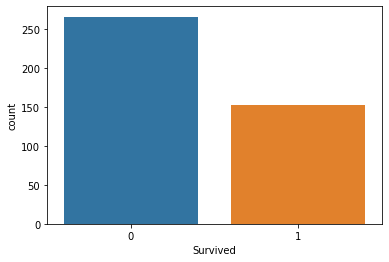

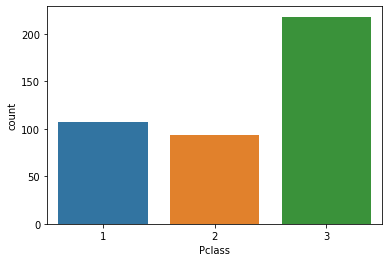

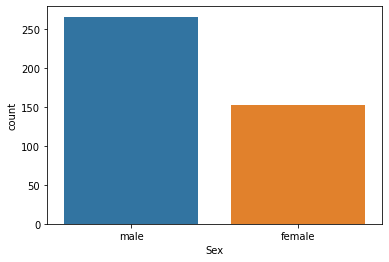

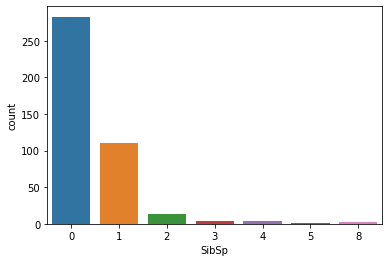

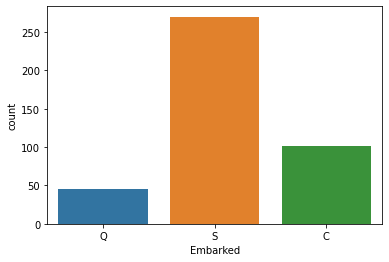

In [15]:
#Data visualization
columns=['Survived','Pclass','Sex','SibSp','Embarked']
for i in columns:
    count_plot(i)

<AxesSubplot:xlabel='Survived', ylabel='count'>

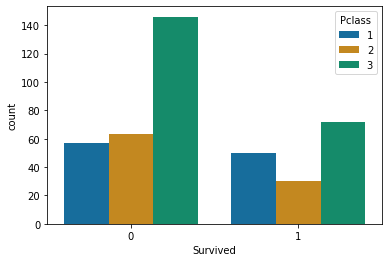

In [16]:
sb.countplot(x='Survived',hue='Pclass',data=titan,palette='colorblind')

<AxesSubplot:>

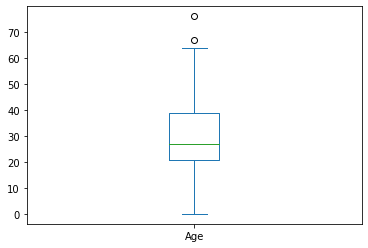

In [17]:
titan["Age"].plot(kind="box")

In [18]:
titan.Age.fillna(titan.Age.mean(),inplace=True)

In [19]:
titan.Fare.fillna(titan.Fare.mode()[0],inplace=True)

In [20]:
new_titan=titan.drop(["Cabin","PassengerId","Name","Ticket"],axis=1)

In [21]:
new_titan.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
new_titan.sample(7)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
415,0,3,male,38.5,0,0,7.2500,S
383,1,3,female,19.0,1,0,16.1000,S
277,0,2,male,40.0,1,0,26.0000,S
217,0,1,male,57.0,1,1,164.8667,S
311,0,3,male,22.0,0,0,7.2250,C
260,0,3,male,36.5,1,0,17.4000,S
264,0,2,male,30.0,0,0,12.7375,C


In [23]:
new_titan.shape

(418, 8)

In [24]:
new_titan.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [25]:
new_titan["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [26]:
# Encoding sex
mapper = {"male":1,"female":0}
new_titan.Sex=new_titan["Sex"].replace(mapper)
new_titan.Sex.sample(10)

411    0
77     0
25     1
302    1
205    1
238    0
190    1
304    0
240    0
263    0
Name: Sex, dtype: int64

In [27]:
#Encoding Embarked
mapper1 = {"S":0,"C":1,"Q":2}
new_titan.Embarked=new_titan["Embarked"].replace(mapper1)
new_titan.Embarked

0      2
1      0
2      2
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Name: Embarked, Length: 418, dtype: int64

In [28]:
new_titan

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.50000,0,0,7.8292,2
1,1,3,0,47.00000,1,0,7.0000,0
2,0,2,1,62.00000,0,0,9.6875,2
3,0,3,1,27.00000,0,0,8.6625,0
4,1,3,0,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,8.0500,0
414,1,1,0,39.00000,0,0,108.9000,1
415,0,3,1,38.50000,0,0,7.2500,0
416,0,3,1,30.27259,0,0,8.0500,0


In [29]:
x=new_titan.drop("Survived",axis=1)
y=new_titan.Survived

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=49)

In [31]:
scaler=StandardScaler()
xtrain_scale=scaler.fit_transform(xtrain)
xtest_scale=scaler.transform(xtest)

In [32]:
#model
log_model=LogisticRegression()
#model fitting
log_model.fit(xtrain,ytrain)

LogisticRegression()

In [33]:
# Prediction of y
ypred=log_model.predict(xtest)
ypred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [34]:
#Evaluation metrics
acc=accuracy_score(ytest,ypred)
acc

1.0

In [35]:
# Logistic Algorithm..
log=LogisticRegression()

start_log=time.time()
log.fit(xtrain_scale,ytrain)
end_log=time.time()

ytest_pred3=log.predict(xtest_scale)
acc_log=accuracy_score(ytest,ytest_pred3)*100

train_score_log=log.score(xtrain_scale,ytrain)*100

print(log)
print("Train Accuracy :{:.5f}".format(train_score_log))
print("Test Accuracy :{:.5f}".format(acc_log))
print("Training Time : {:.2f} seconds.".format(end_log-start_log))

LogisticRegression()
Train Accuracy :100.00000
Test Accuracy :100.00000
Training Time : 0.01 seconds.


In [36]:
# KNN Algorithm..
knn=KNeighborsClassifier(n_neighbors=5)

start_knn=time.time()
knn.fit(xtrain_scale,ytrain)
end_knn=time.time()

ytest_pred=knn.predict(xtest_scale)
acc_knn=accuracy_score(ytest,ytest_pred)*100

train_score_knn=knn.score(xtrain_scale,ytrain)*100

print(knn)
print("Train Accuracy :{:.5f} ".format(train_score_knn))
print("Test Accuracy :{:.5f}".format(acc_knn))
print("Training Time : {:.2f} seconds.".format(end_knn-start_knn))

KNeighborsClassifier()
Train Accuracy :99.31507 
Test Accuracy :96.82540
Training Time : 0.01 seconds.


In [37]:
# DT Algorithm..
dt=DecisionTreeClassifier()

start_dt=time.time()
dt.fit(xtrain_scale,ytrain)
end_dt=time.time()

ytest_pred1=dt.predict(xtest_scale)
acc_dt=accuracy_score(ytest,ytest_pred1)*100

train_score_dt=dt.score(xtrain_scale,ytrain)*100


print(dt)
print("Train Accuracy :{:.5f}".format(train_score_dt))
print("Test Accuracy :{:.5f}".format(acc_dt))
print("Training Time : {:.2f} seconds.".format(end_dt-start_dt))


DecisionTreeClassifier()
Train Accuracy :100.00000
Test Accuracy :100.00000
Training Time : 0.00 seconds.


In [38]:
# RandomForest Algorithm..
rf=RandomForestClassifier()

start_rf=time.time()
rf.fit(xtrain_scale,ytrain)
end_rf=time.time()

ytest_pred5=rf.predict(xtest_scale)
acc_rf=accuracy_score(ytest,ytest_pred5)*100

train_score_rf=rf.score(xtrain_scale,ytrain)*100

print(rf)
print("Train Accuracy :{:.5f}".format(train_score_rf))
print("Test Accuracy :{:.5f}".format(acc_rf))
print("Training Time : {:.2f} seconds.".format(end_rf-start_rf))

RandomForestClassifier()
Train Accuracy :100.00000
Test Accuracy :100.00000
Training Time : 0.27 seconds.
